#### EDA Visualization

C:\Users\betsi\AppData\Local\Temp\ipykernel_15220\3968595354.py:6: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('E:/Tenx/Week 3/data/cleaned_insurance_data.csv')


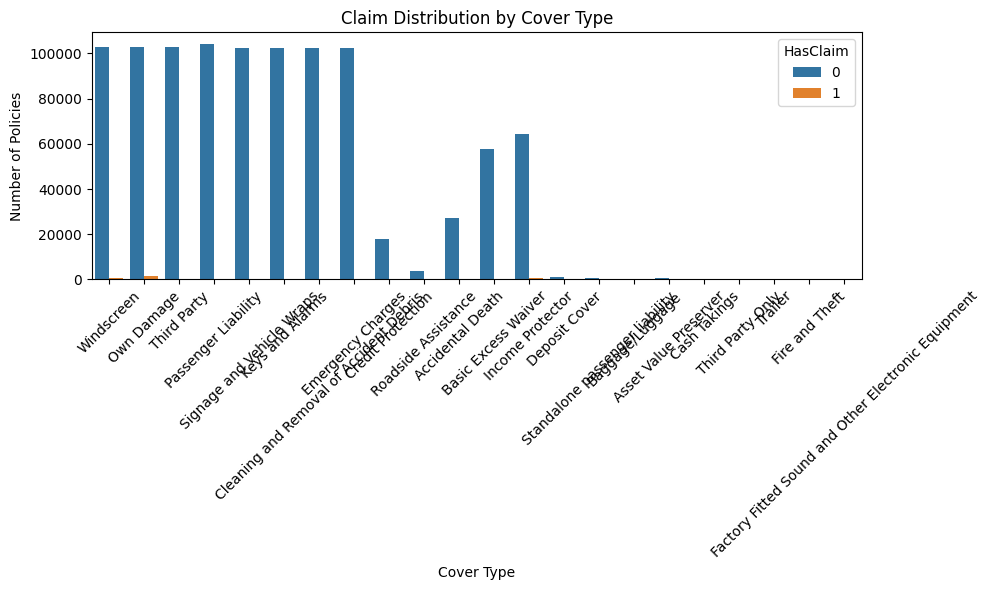

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('E:/Tenx/Week 3/data/cleaned_insurance_data.csv')

# Create 'HasClaim' column: 1 if TotalClaims > 0, else 0
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CoverType', hue='HasClaim')
plt.title('Claim Distribution by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Number of Policies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'CrossBorder', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


C:\Users\betsi\AppData\Local\Temp\ipykernel_13232\903361176.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claim_heatmap = df.groupby(['AgeBin', 'Claim']).size().unstack(fill_value=0)


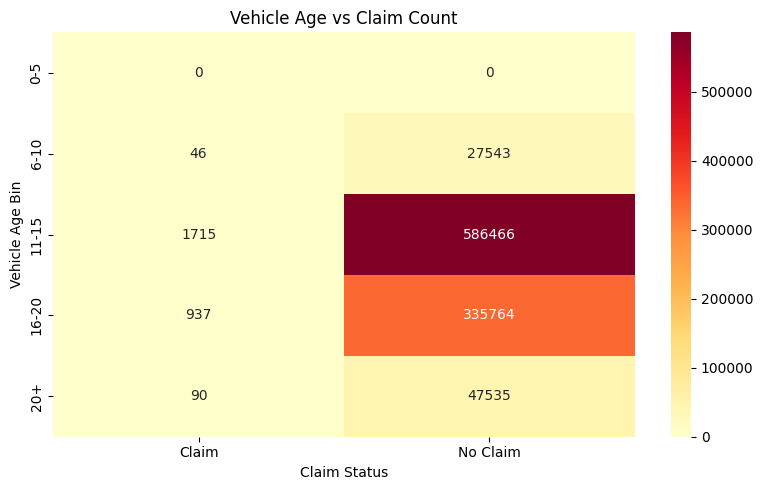

In [ ]:
# Visualize relationship between age and claims using a 2D heatmap.

import numpy as np

# Assume vehicle age in 2025
df['VehicleAge'] = 2025 - df['RegistrationYear']

# Bin the age
df['AgeBin'] = pd.cut(df['VehicleAge'], bins=[0, 5, 10, 15, 20, 100], labels=['0-5', '6-10', '11-15', '16-20', '20+'])

# Group by age bin and claim
claim_heatmap = df.groupby(['AgeBin', 'Claim']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(claim_heatmap, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Vehicle Age vs Claim Count')
plt.xlabel('Claim Status')
plt.ylabel('Vehicle Age Bin')
plt.tight_layout()
plt.show()



Correlation Matrix

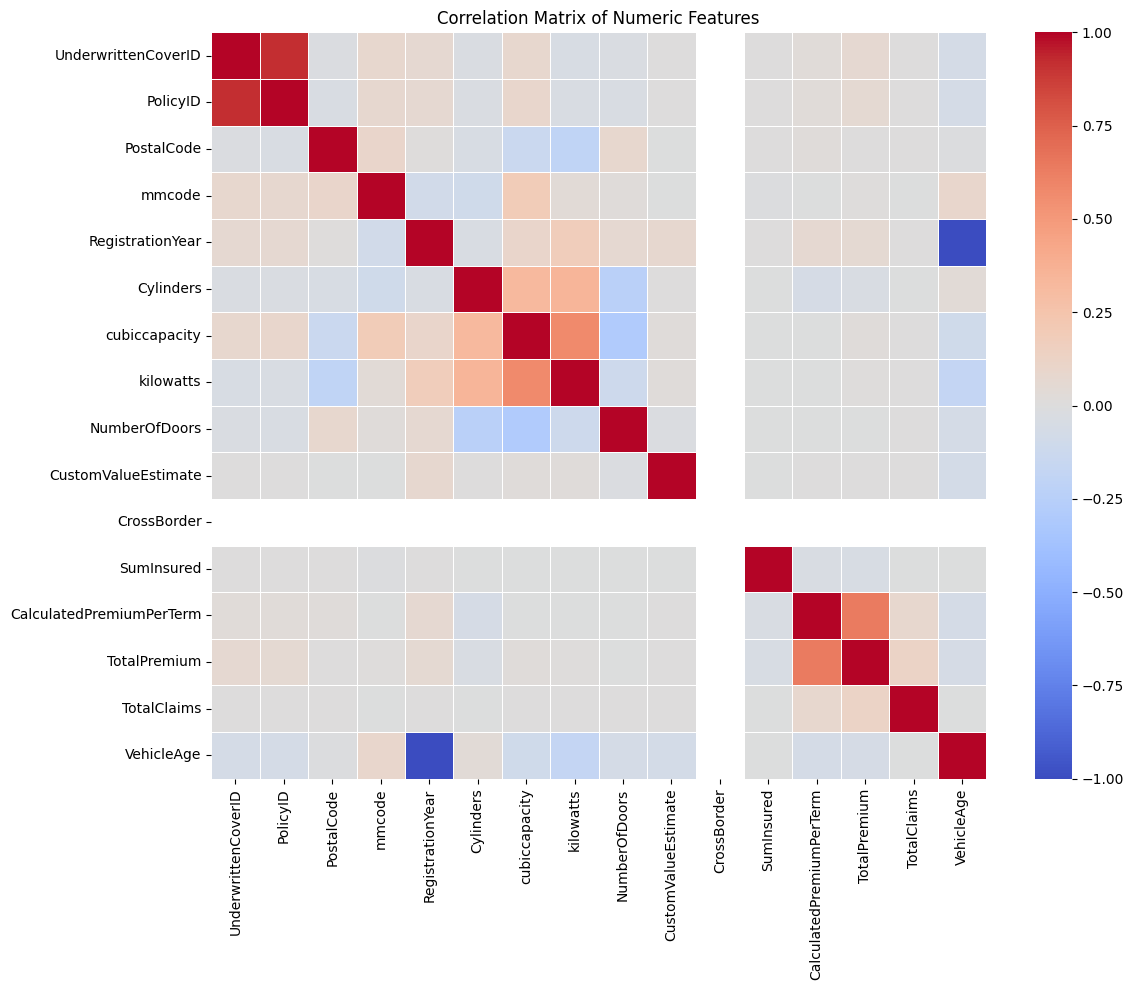

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Plot correlation
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()
